# Project: Milestone 2

## Cleaning/Formatting Flat File Source

Amelia Farrell

DSC540

4/14/23

In [53]:

# Connecting to google drive
from google.colab import drive 
drive.mount('/content/drive')

# Change to the google drive directory
%cd /content/drive/MyDrive/Colab\ Notebooks/DSC540/FinalProject

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DSC540/FinalProject


## Step 1: Understanding the data

We need to first read and understand the data within the flat file, check for oulires, missing data, etc. This will help us know what transformations are needed.

In [3]:
# importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import hashlib

In [4]:
# Loading the flat file into a Pandas DataFrame
df = pd.read_excel("spotify_dataset.xlsx", sheet_name='spotify_dataset')

In [5]:
# view header names
header_names = df.columns
print(header_names)

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'popularity', 'decade'],
      dtype='object')


In [5]:
# viewing the dataframe with headers and first rows
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,jealous kind of fella,garland green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,initials b.b.,serge gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,melody twist,lord melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,mi bomba sonó,celia cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,uravu solla,p. susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [6]:
# checking for missing vaules
missing_values = df.isnull()
# Count the number of missing values in each column
num_missing = missing_values.sum()
# Print the result
print(num_missing)

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
popularity          0
decade              0
dtype: int64


In [ ]:
# checking for outlires by Z-score (for each song attribute)
z_scores = (df - df.mean()) / df.std()

# Identify any data points with a Z-score greater than 3
outliers = z_scores.abs() > 3

# Count the number of outliers in each column
num_outliers = outliers.sum()

# Print the result
print(num_outliers)

acousticness           0
artist                 0
chorus_hit           669
danceability           1
decade                 0
duration_ms          531
energy                 0
instrumentalness       0
key                    0
liveness            1076
loudness             635
mode                   0
popularity             0
sections             494
speechiness          953
tempo                 69
time_signature       374
track                  0
uri                    0
valence                0
dtype: int64


<ipython-input-7-c914416a536b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()
<ipython-input-7-c914416a536b>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()


<Axes: xlabel='Value', ylabel='Variable'>

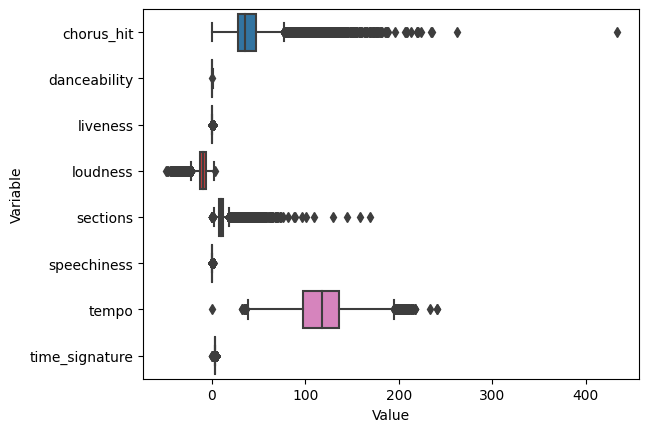

In [28]:
# now we want to visulize the outliers (only the columns with many outliers)
columns_to_plot = ['chorus_hit', 'danceability','liveness', 'loudness','sections', 'speechiness','tempo', 'time_signature'] # selecting variables of intrest
df_melted = pd.melt(df[columns_to_plot], var_name='Variable', value_name='Value')
sns.boxplot(data=df_melted, y='Variable', x='Value', orient='h')

In [24]:
# As we can see above there are a few significant outliers in chorus_hit and tempo. Now these may be improtance peices of data and we do not want to remove them immediately. 
# Lets take a closer look at what song these outliers are tied to

# finding the 3 maximum values in chorus_hit by idenifing then filtering
top_3_chorus_hit = df['chorus_hit'].nlargest(3)
filtered_chorus_hit = df[df['chorus_hit'].isin(top_3_chorus_hit)]
filtered_chorus_hit_df = pd.DataFrame(filtered_chorus_hit)
filtered_chorus_hit_df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
19333,pinnacles,edgar froese,spotify:track:5z2z4je8pvvoFXQ1uQ1paQ,0.356,0.374,0,-16.300,0,0.0309,0.733000,0.850000,0.104,0.0863,108.412,1314160,4,433.18200,46,0,80s
19856,deliver me from mine enemies,diamanda galás,spotify:track:08e6U2QpbkKEeguPxKPqvZ,0.195,0.582,11,-16.648,0,0.1480,0.771000,0.005540,0.659,0.0382,75.974,1157493,4,235.61008,27,0,80s
34333,wheels,foo fighters,spotify:track:3KsatAMRt1a7iryhWt5I8U,0.426,0.792,9,-4.709,1,0.0374,0.000495,0.000005,0.142,0.5570,161.994,278213,4,262.61540,3,1,00s


In [26]:
# finding the 2 maximum values in tempo by idenifing then filtering
top_2_tempo = df['tempo'].nlargest(2)
filtered_tempo = df[df['tempo'].isin(top_2_tempo)]
filtered_tempo_df = pd.DataFrame(filtered_tempo)

# finding the 1 minimum value in tempo by idenifing then filtering
min_1_tempo = df['tempo'].nsmallest(1)
filtered_tempo_min = df[df['tempo'].isin(min_1_tempo)]
filtered_tempo_min_df = pd.DataFrame(filtered_tempo_min)

# appending the two above dataframes vertically
tempo_max_min = pd.concat([filtered_tempo_df, filtered_tempo_min_df])
tempo_max_min

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
5818,heart,kenny chandler,spotify:track:3oMyOytWFz0Ydd0GSfpdcW,0.455,0.199,2,-15.392,1,0.0977,0.728,0.000,0.130,0.776,241.009,167173,3,35.97162,12,1,60s
10603,rock me,muddy waters,spotify:track:0xWjDw2EcrFmpQ2cRBiNLe,0.375,0.689,9,-10.055,1,0.0971,0.815,0.853,0.187,0.613,241.423,230440,3,58.06217,15,0,70s
6857,trust in me,etta james,spotify:track:5Zu9mG353GB3p26t7M5AmR,0.000,0.377,10,-6.777,0,0.0000,0.776,0.000,0.390,0.000,0.000,178467,0,26.02934,7,1,60s


In [ ]:
# After taking a closer look at these outlires, we can see that most songs (other than Wheels by the foo fighters) fall out of the date range that we are looking at (1960 through 2019). Due to this, we dont need to worry about removing them, as they will not be in out final data set. 
# For 'Wheels', we will include it for now since this song may or may not be included in our final set (as it was be based our Website data). However, we will note at as something to check for in our fianl analysis.

# now that we understand out data a bit better (no missing vaules, understand outlires), we can began our transformations.


## Step 2: Remove Columns

*   Popularity- irrelivant, as this column is based on the time the data was pulled and not how poplar the song was in the year it was released (what our anaylsis is looking at)
*   Decade - irrelivant, as we want to look at the 'Year' the song was released 

In [6]:
# removing ("dropping") inessential columns
df2 = df.drop(columns=['popularity','decade'])

## Step 3: Replace Headers

We want re-name the headers so it will be easier to understand the and combine with out other datasets.

In [7]:
# replace the header names of select columns
new_names = {'track': 'song_name',
             'uri': 'spotify_id',
             'artist': 'song_artist'}

df3 = df2.rename(columns=new_names)

# view header names
new_header_names = df3.columns
print(new_header_names)

Index(['song_name', 'song_artist', 'spotify_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections'],
      dtype='object')


## Step 4: Strip white space characters

Next, we will want to strip any white space charaters from 'Song_Name' and 'Song_Artist'. Since we want to combine these two feilds and create a unique identifier in each of our data sets, we need to ensure that there are no trailing white spaces or the IDs may end up differing between the data sets.

In [8]:
# strip white space characters from song_name
df3['song_name'] = df3['song_name'].str.strip()

# strip white space characters from song_artist
df3['song_artist'] = df3['song_artist'].str.strip()

##  Step 5: Unique Identifier

Before we can check for duplicates we need to create a unique identifier for each Artist's song. Since songs can have the same we need to combine the 'Song_Name' and 'Song_Artist' to check for duplicates. However, if we just combine the two columns, it will carry over the spaces from the song names and artists. This is not the best way to create a unique identifier. Rather than having messy unique identifiers with spaces, we will create a hash for each.

In [9]:
# creating our own hashing function that will loop through each row and create our unique identifier (this wil be done in each dataset)
def hash_function(row):
  combined=("{}{}".format(row['song_name'],row['song_artist'])).encode('utf-8')
  row['uid'] = hashlib.md5(combined).hexdigest()
  return row

df3 = df3.apply(hash_function, axis=1)

# viewing new data set with hash (Unique Identifier (uid))
df3.head()


,song_name,song_artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,uid
0,jealous kind of fella,garland green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,e8f3efdd6ac74332876f615af0daf6c7
1,initials b.b.,serge gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,8757b103a9738f17425e455bdfe7242a
2,melody twist,lord melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,dc2354b2794a897927eda04b5f575413
3,mi bomba sonó,celia cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,a50a8e15cab1e07b83e1726d9ca4eda8
4,uravu solla,p. susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,d8c645edfe864872c257a70d7f527e97


## Step 6: Check & Remove Duplicates

New that we have a unique identifier for each song, we can check for duplicates and remove them if they exsist.

In [51]:
# cheking for duplicates
print("Is Unique Identifier duplictaed? - {}".format(any(df3.uid.duplicated())))

Is Unique Identifier duplictaed? - True


In [52]:
# creating a new dataframe with duplicates removed (this removes all duplicate vulues other than the first occurrence based on the Unique Identifier)
df4 = df3.drop_duplicates(subset='uid')
# calculate the difference
df_diff = pd.concat([df3,df4]).drop_duplicates(keep=False)
# how many duplicates were removed?
print(len(df_diff))

719


In [48]:
# this means that we have 719 songs with duplicate vaules
# to understand why, we will look at a few of the songs

# check 1
df3.loc[df3['uid']== '463d94d138fdf86a22306b664f9dc4ff']

,song_name,song_artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,uid
825,sleeping in a jar,frank zappa,spotify:track:2llNGn70gQLrVgdrWsQ4un,0.323,0.695,9,-11.953,0,0.0647,0.0501,0.219,0.204,0.633,175.488,50720,4,11.80967,3,463d94d138fdf86a22306b664f9dc4ff
1026,sleeping in a jar,frank zappa,spotify:track:67tdrEOSUnbYdxH6r8bydi,0.323,0.695,9,-11.953,0,0.0647,0.0501,0.219,0.204,0.633,175.488,50720,4,11.80967,3,463d94d138fdf86a22306b664f9dc4ff


In [42]:
# check 2
df3.loc[df3['uid']== 'c93cd40923b9cafcd1ae2703acbf4725']

,song_name,song_artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,uid
27412,punk rock confidential,the queers,spotify:track:1V9xkF21MfjpUphGggxT4L,0.558,0.954,2,-3.427,1,0.0430,0.00343,0.003890,0.318,0.913,104.905,105107,4,48.1140,4,c93cd40923b9cafcd1ae2703acbf4725
41010,punk rock confidential,the queers,spotify:track:6mD3s57H8tYHnLpUOHmI8I,0.297,0.894,7,-3.712,1,0.0345,0.00271,0.000003,0.138,0.909,97.159,114672,4,63.3506,6,c93cd40923b9cafcd1ae2703acbf4725


In [43]:
# check 3
df3.loc[df3['uid']== 'f4e2f475ec22b1ff7c0af54b2d221c48']

,song_name,song_artist,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,uid
34950,metal tribes,panzerchrist,spotify:track:0fI8yFkugOJAui29uYh41I,0.198,0.952,2,-4.39,1,0.132,0.0,0.816,0.057,0.126,103.453,298133,3,28.66693,14,f4e2f475ec22b1ff7c0af54b2d221c48
41055,metal tribes,panzerchrist,spotify:track:5QvcYZ93OgZ9AC6px1bG2y,0.198,0.952,2,-4.39,1,0.132,0.0,0.816,0.057,0.126,103.453,298133,3,28.66693,14,f4e2f475ec22b1ff7c0af54b2d221c48


In [ ]:
# Based on the above we can conclude that these duplicates are due to spotify having two slightly different versions. Due to this we can conclude that the duplicate removal does not impact the integrity of our data set.
# Our final Flat File dataset will be df4.

## Ethical Implications

From a top level view it would appear that our data transformations above are ethically sound. Our data does not touch upon personal data, race, gender, or exclude any information that could potentially skew our data. However, when it comes to data ethics, we have to think deeper regarding our data transformations and how they could impact the results of our analysis. We have removed the 'popularity' and 'decade' variables. Does removing this data introduce bias to our data set or make it more meaningful? We had removed 'popularity' and 'decade' because they would have introduced bias in our analysis. Removing 'popularity' ensures that we are not looking at our data incorrectly. As we want to look at how popular the song was in the year it was released (not the year the data was pulled). Looking at this 'popularity' measure would produce false results. 'decade' needed to be removed, to help increase the accuracy of our analysis. Since tastes in music can differ tremendously year/year, grouping songs by the decade they were released would reduce the significance of our final analysis. We will be adding the exact date the song was released later on in this analysis. Later to be grouped by year (removing any seasonality).